In [2]:
import json
import matplotlib.pyplot as plt

## Train and Val Loss graphs

#### Load Loss Data

In [3]:
LSTM_dat = None
with open("./Performance_Dump/Loss Dump/LSTM.json") as json_file: LSTM_dat = json.load(json_file)

Stacked_LSTM_dat = None
with open("./Performance_Dump/Loss Dump/Stacked_LSTM.json") as json_file: Stacked_LSTM_dat = json.load(json_file)

GRU_dat = None
with open("./Performance_Dump/Loss Dump/GRU.json") as json_file: GRU_dat = json.load(json_file)

LSTM_GRU_dat = None
with open("./Performance_Dump/Loss Dump/LSTM_GRU.json") as json_file: LSTM_GRU_dat = json.load(json_file)

#### LSTM

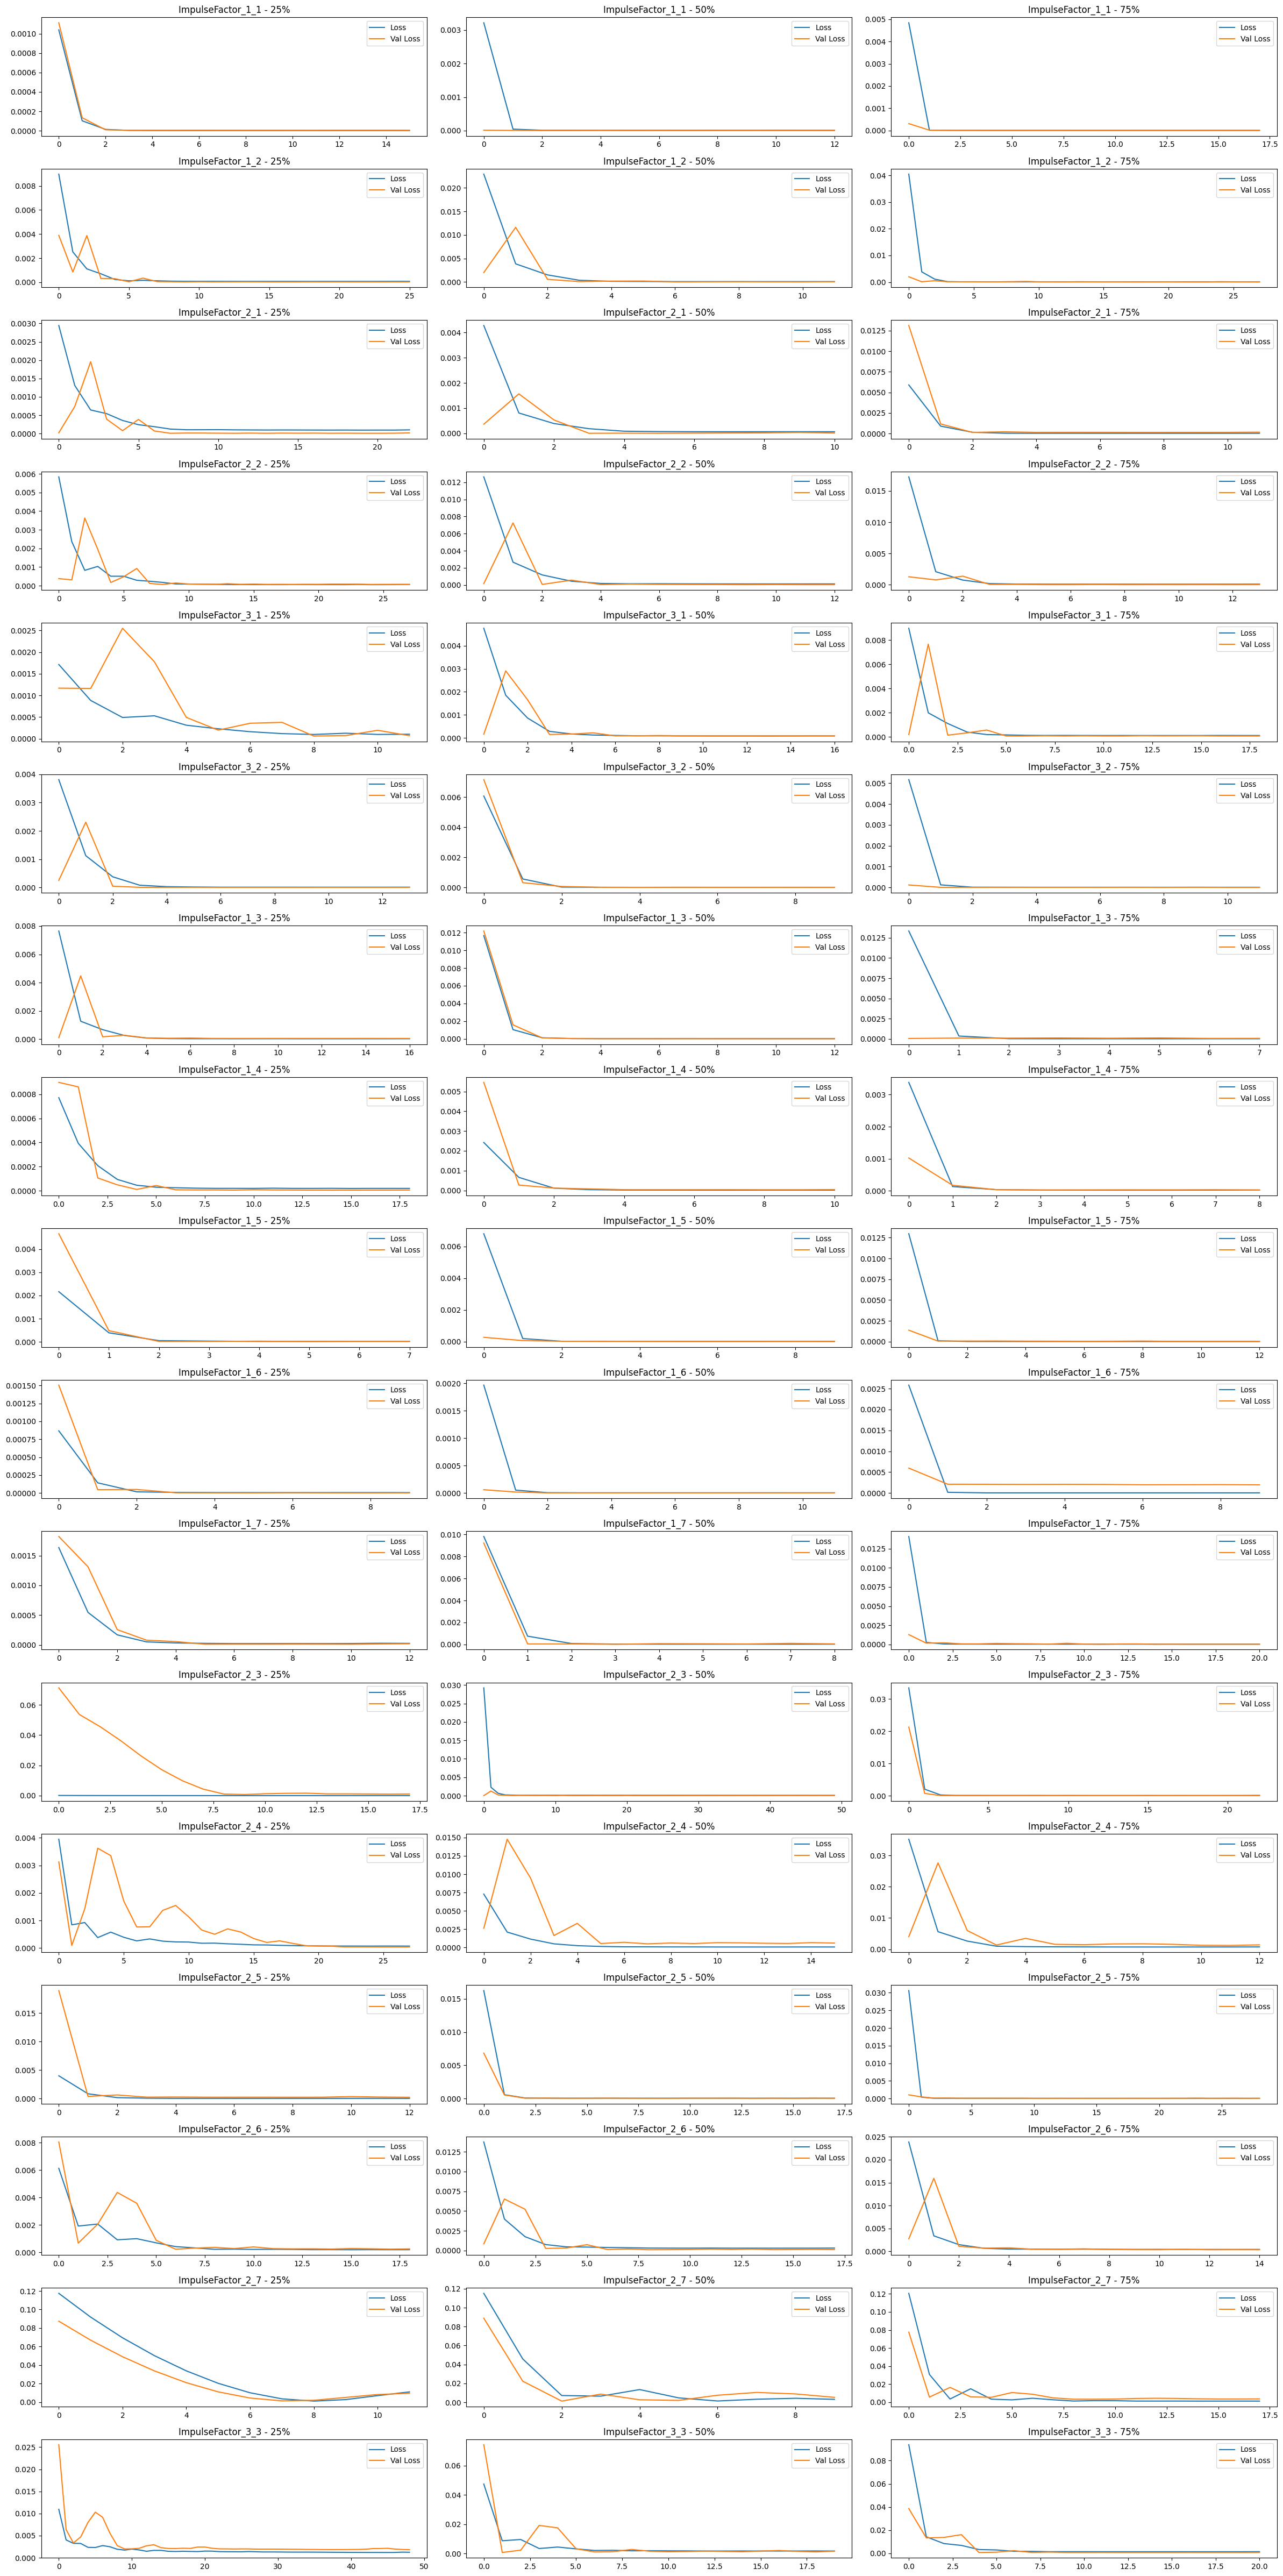

In [51]:
fig, axs = plt.subplots(len(LSTM_dat), 3, figsize=(24, 48))

for i, bearing in enumerate(LSTM_dat):
    bearing_id = list(bearing.keys())[0]
    bearing_losses = list(bearing.values())[0]

    for j, loss in enumerate(bearing_losses):

        train_loss = loss["loss"]
        val_loss = loss["val_loss"]

        axs[i, j].plot(train_loss, label='Loss')
        axs[i, j].plot(val_loss, label='Val Loss')
        axs[i, j].set_title(f"{bearing_id} - {(1 + j) * 25}%")
        axs[i, j].legend()

plt.tight_layout()
plt.show()

#### Stacked LSTM

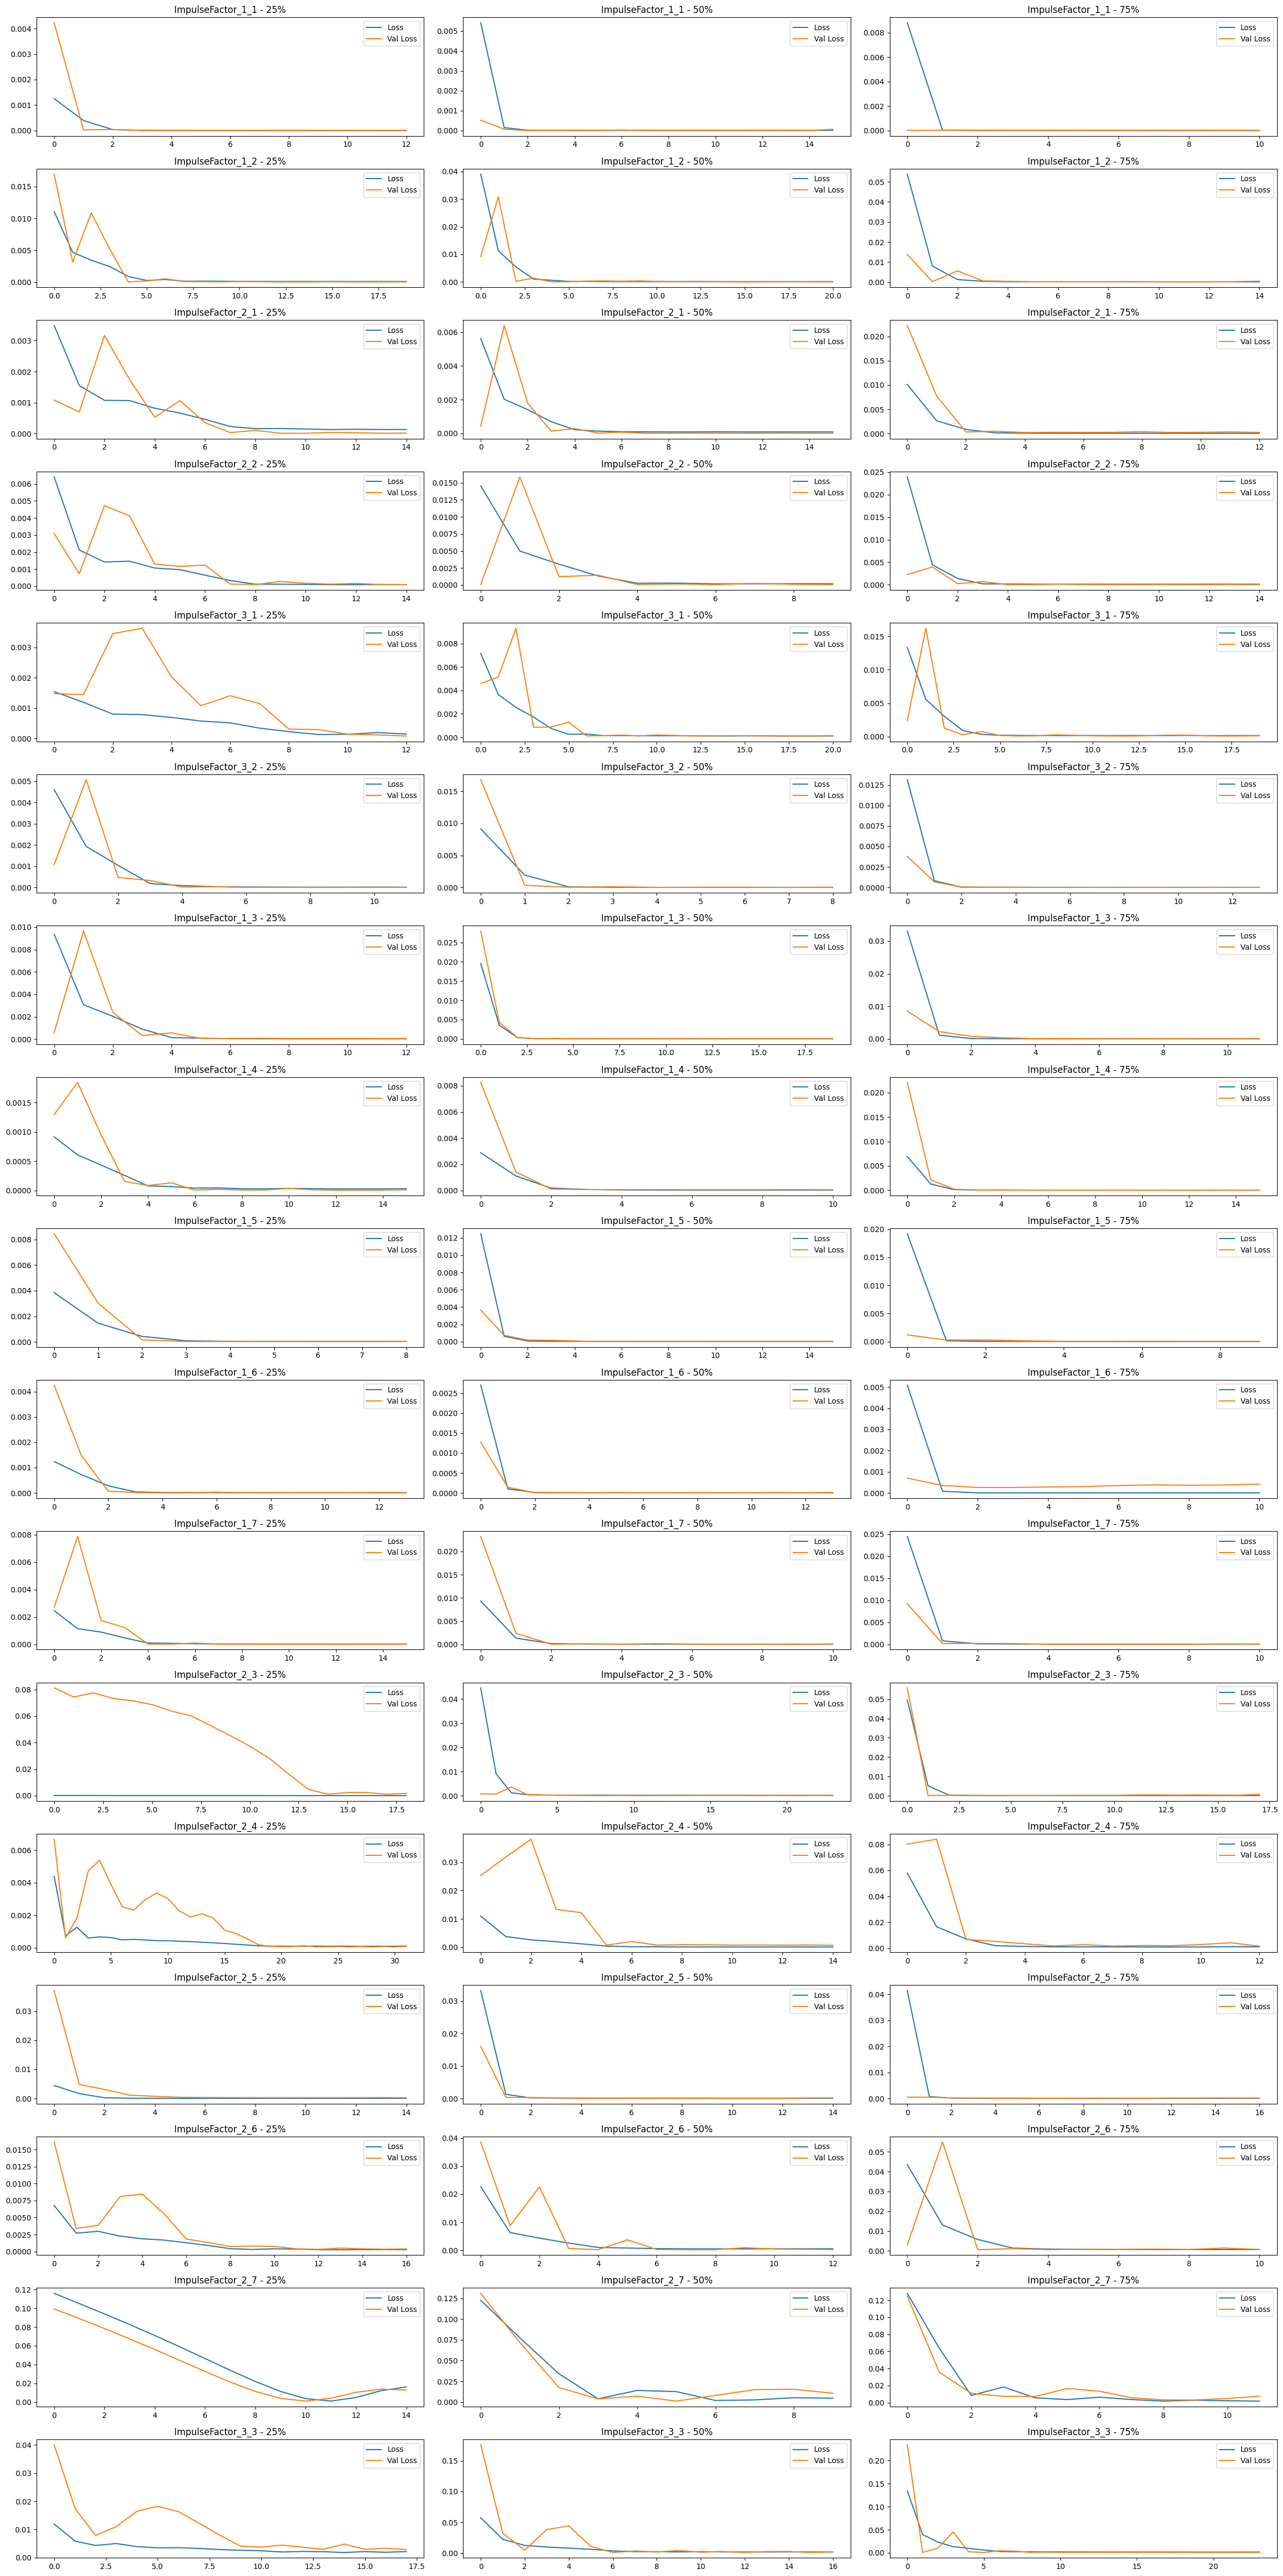

In [52]:
fig, axs = plt.subplots(len(Stacked_LSTM_dat), 3, figsize=(24, 48))

for i, bearing in enumerate(Stacked_LSTM_dat):
    bearing_id = list(bearing.keys())[0]
    bearing_losses = list(bearing.values())[0]

    for j, loss in enumerate(bearing_losses):

        train_loss = loss["loss"]
        val_loss = loss["val_loss"]

        axs[i, j].plot(train_loss, label='Loss')
        axs[i, j].plot(val_loss, label='Val Loss')
        axs[i, j].set_title(f"{bearing_id} - {(1 + j) * 25}%")
        axs[i, j].legend()

plt.tight_layout()
plt.show()

#### GRU

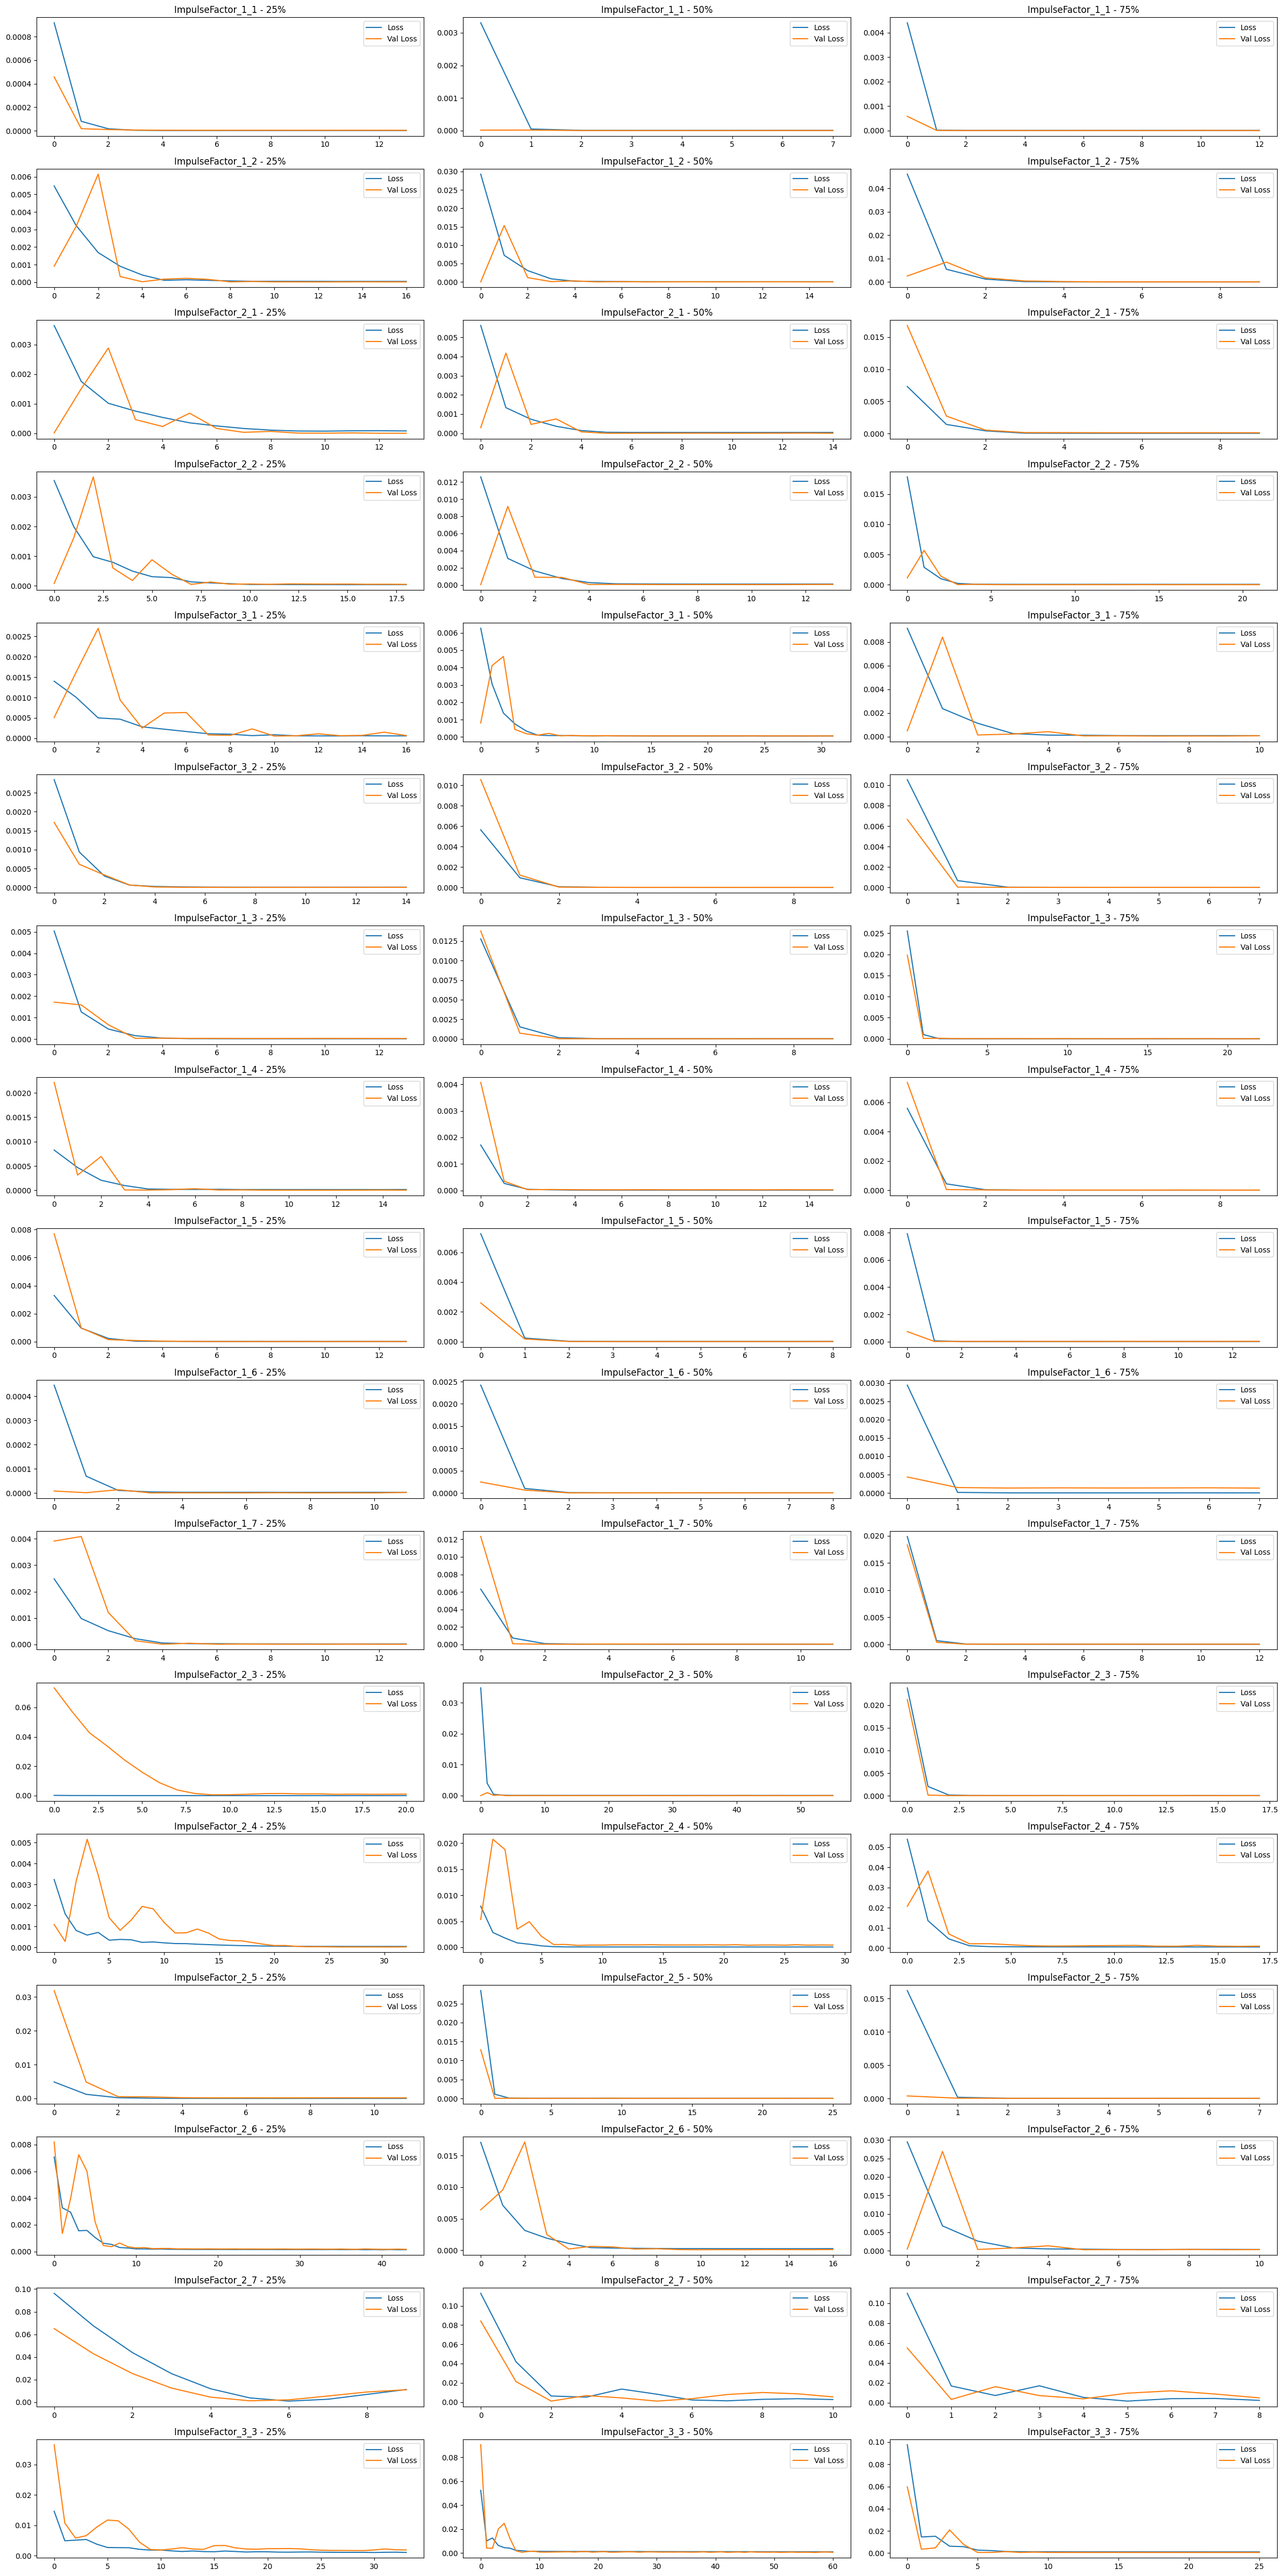

In [53]:
fig, axs = plt.subplots(len(GRU_dat), 3, figsize=(24, 48))

for i, bearing in enumerate(GRU_dat):
    bearing_id = list(bearing.keys())[0]
    bearing_losses = list(bearing.values())[0]

    for j, loss in enumerate(bearing_losses):

        train_loss = loss["loss"]
        val_loss = loss["val_loss"]

        axs[i, j].plot(train_loss, label='Loss')
        axs[i, j].plot(val_loss, label='Val Loss')
        axs[i, j].set_title(f"{bearing_id} - {(1 + j) * 25}%")
        axs[i, j].legend()

plt.tight_layout()
plt.show()

#### LSTM - GRU

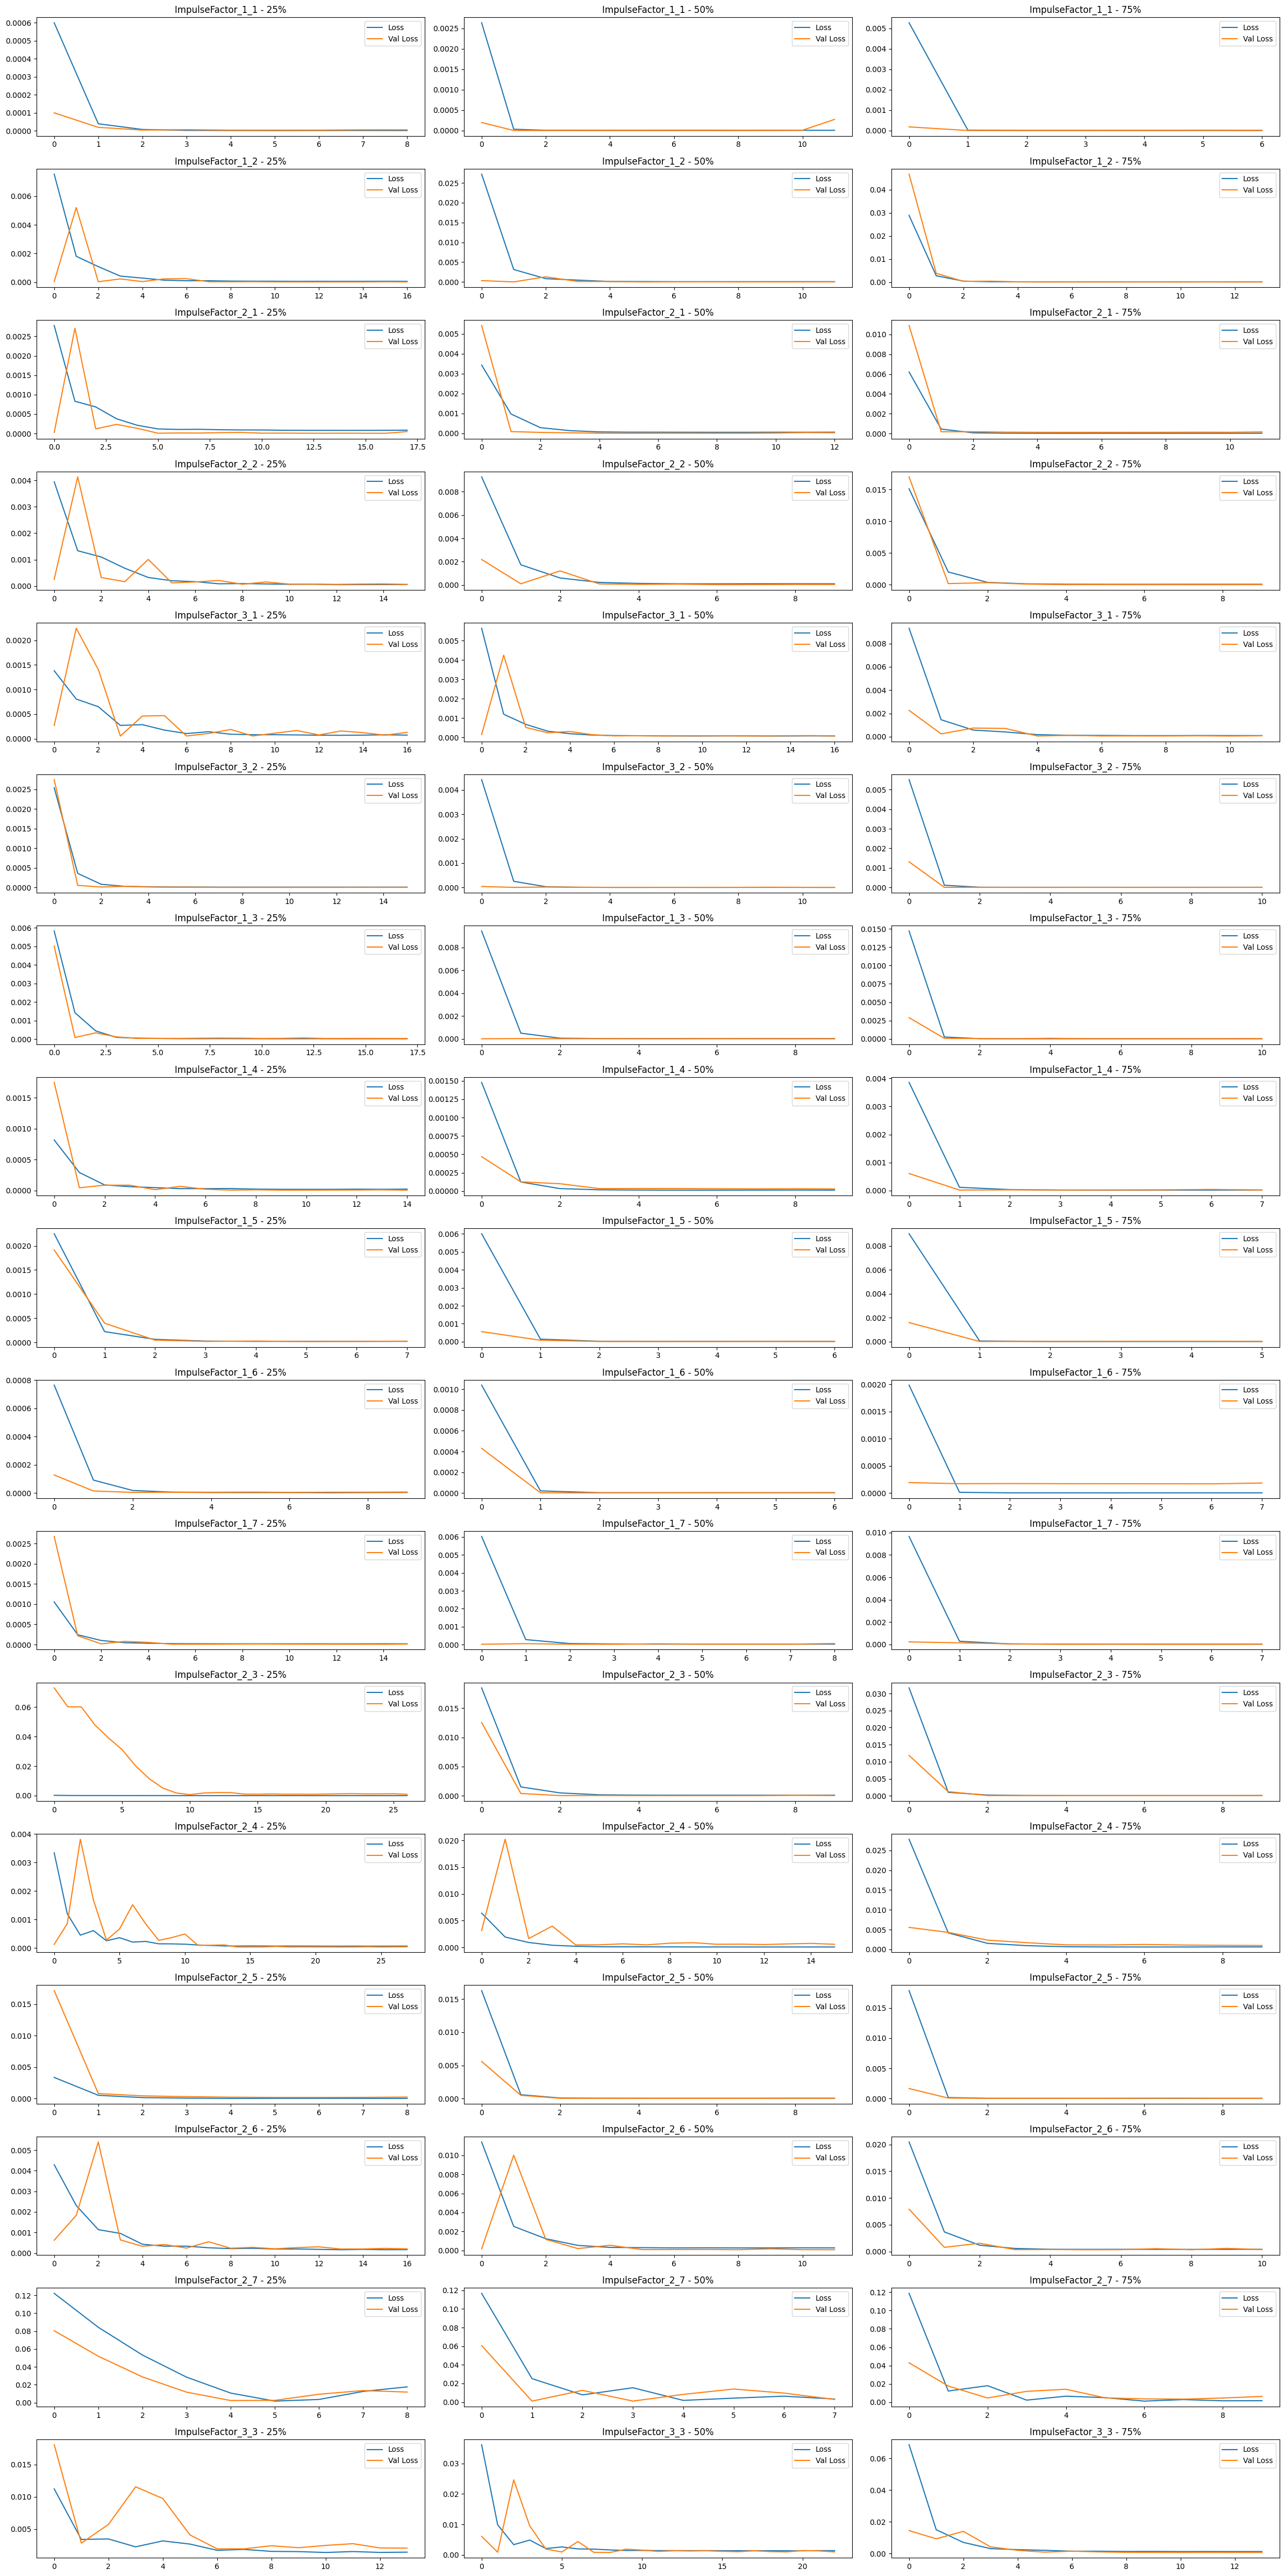

In [54]:
fig, axs = plt.subplots(len(LSTM_GRU_dat), 3, figsize=(24, 48))

for i, bearing in enumerate(LSTM_GRU_dat):
    bearing_id = list(bearing.keys())[0]
    bearing_losses = list(bearing.values())[0]

    for j, loss in enumerate(bearing_losses):

        train_loss = loss["loss"]
        val_loss = loss["val_loss"]

        axs[i, j].plot(train_loss, label='Loss')
        axs[i, j].plot(val_loss, label='Val Loss')
        axs[i, j].set_title(f"{bearing_id} - {(1 + j) * 25}%")
        axs[i, j].legend()

plt.tight_layout()
plt.show()

# Metric-wise model comparision

#### load all scores

In [3]:
Poly_Reg_Logistic_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/Poly_Reg_Logistic.json") as json_file: Poly_Reg_Logistic_dat = json.load(json_file)

GPR_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/GPR_Logistic.json") as json_file: GPR_dat = json.load(json_file)

LSTM_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM.json") as json_file: LSTM_dat = json.load(json_file)

Stacked_LSTM_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/Stacked_LSTM.json") as json_file: Stacked_LSTM_dat = json.load(json_file)

GRU_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/GRU.json") as json_file: GRU_dat = json.load(json_file)

LSTM_GRU_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM_GRU.json") as json_file: LSTM_GRU_dat = json.load(json_file)

In [4]:
def getMetricScore(source: list, train_perc: int, score: str):
    dat = [list(x.values())[0][train_perc][score] for x in source]
    return dat

#### R2

25% Train

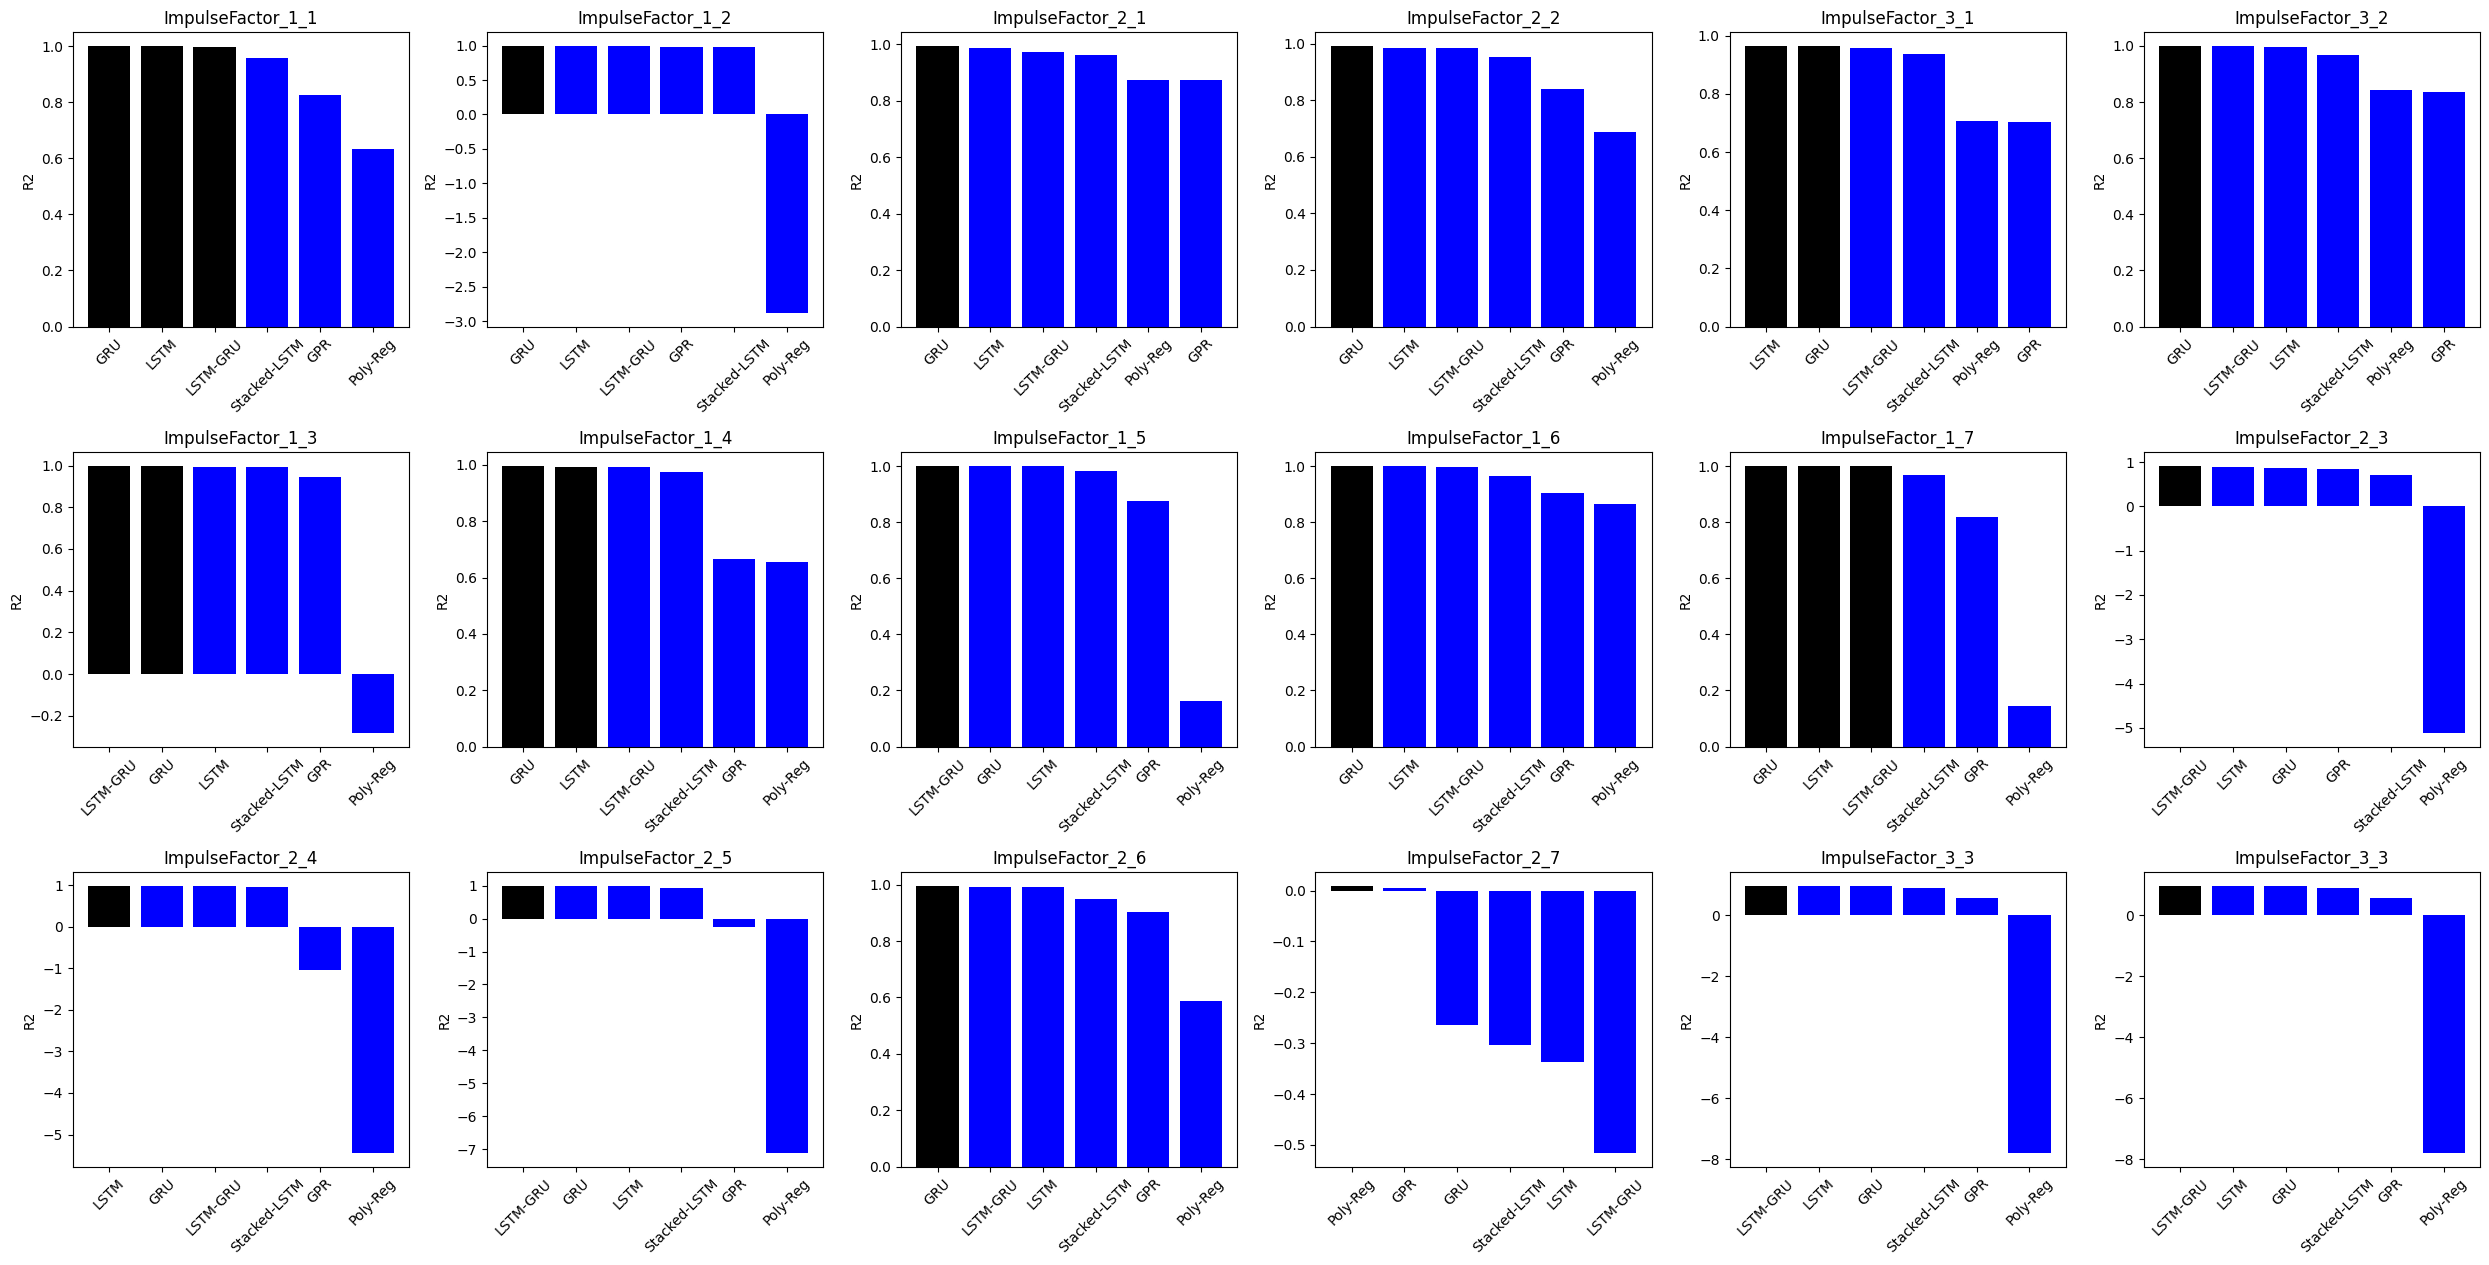

In [14]:
import matplotlib.pyplot as plt
import numpy as np

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
config = [0, "R2"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

fig, axes = plt.subplots(3, 6, figsize=(25, 0.75*len(bearing_ids)))

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, 16)

        # sort models by 
        keys = list(r2_25_perc.keys())
        values = [d[index] for d in r2_25_perc.values()]
        zipped = zip(keys, values)
        sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1], reverse=True)
        keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value to 2 digits
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        ax.bar(keys, values, color=bar_colors)
        ax.set_xticks(keys)
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45)
        ax.set_title(bearing_ids[index])
        ax.set_ylabel('R2')

plt.tight_layout()
plt.show()

50% Train

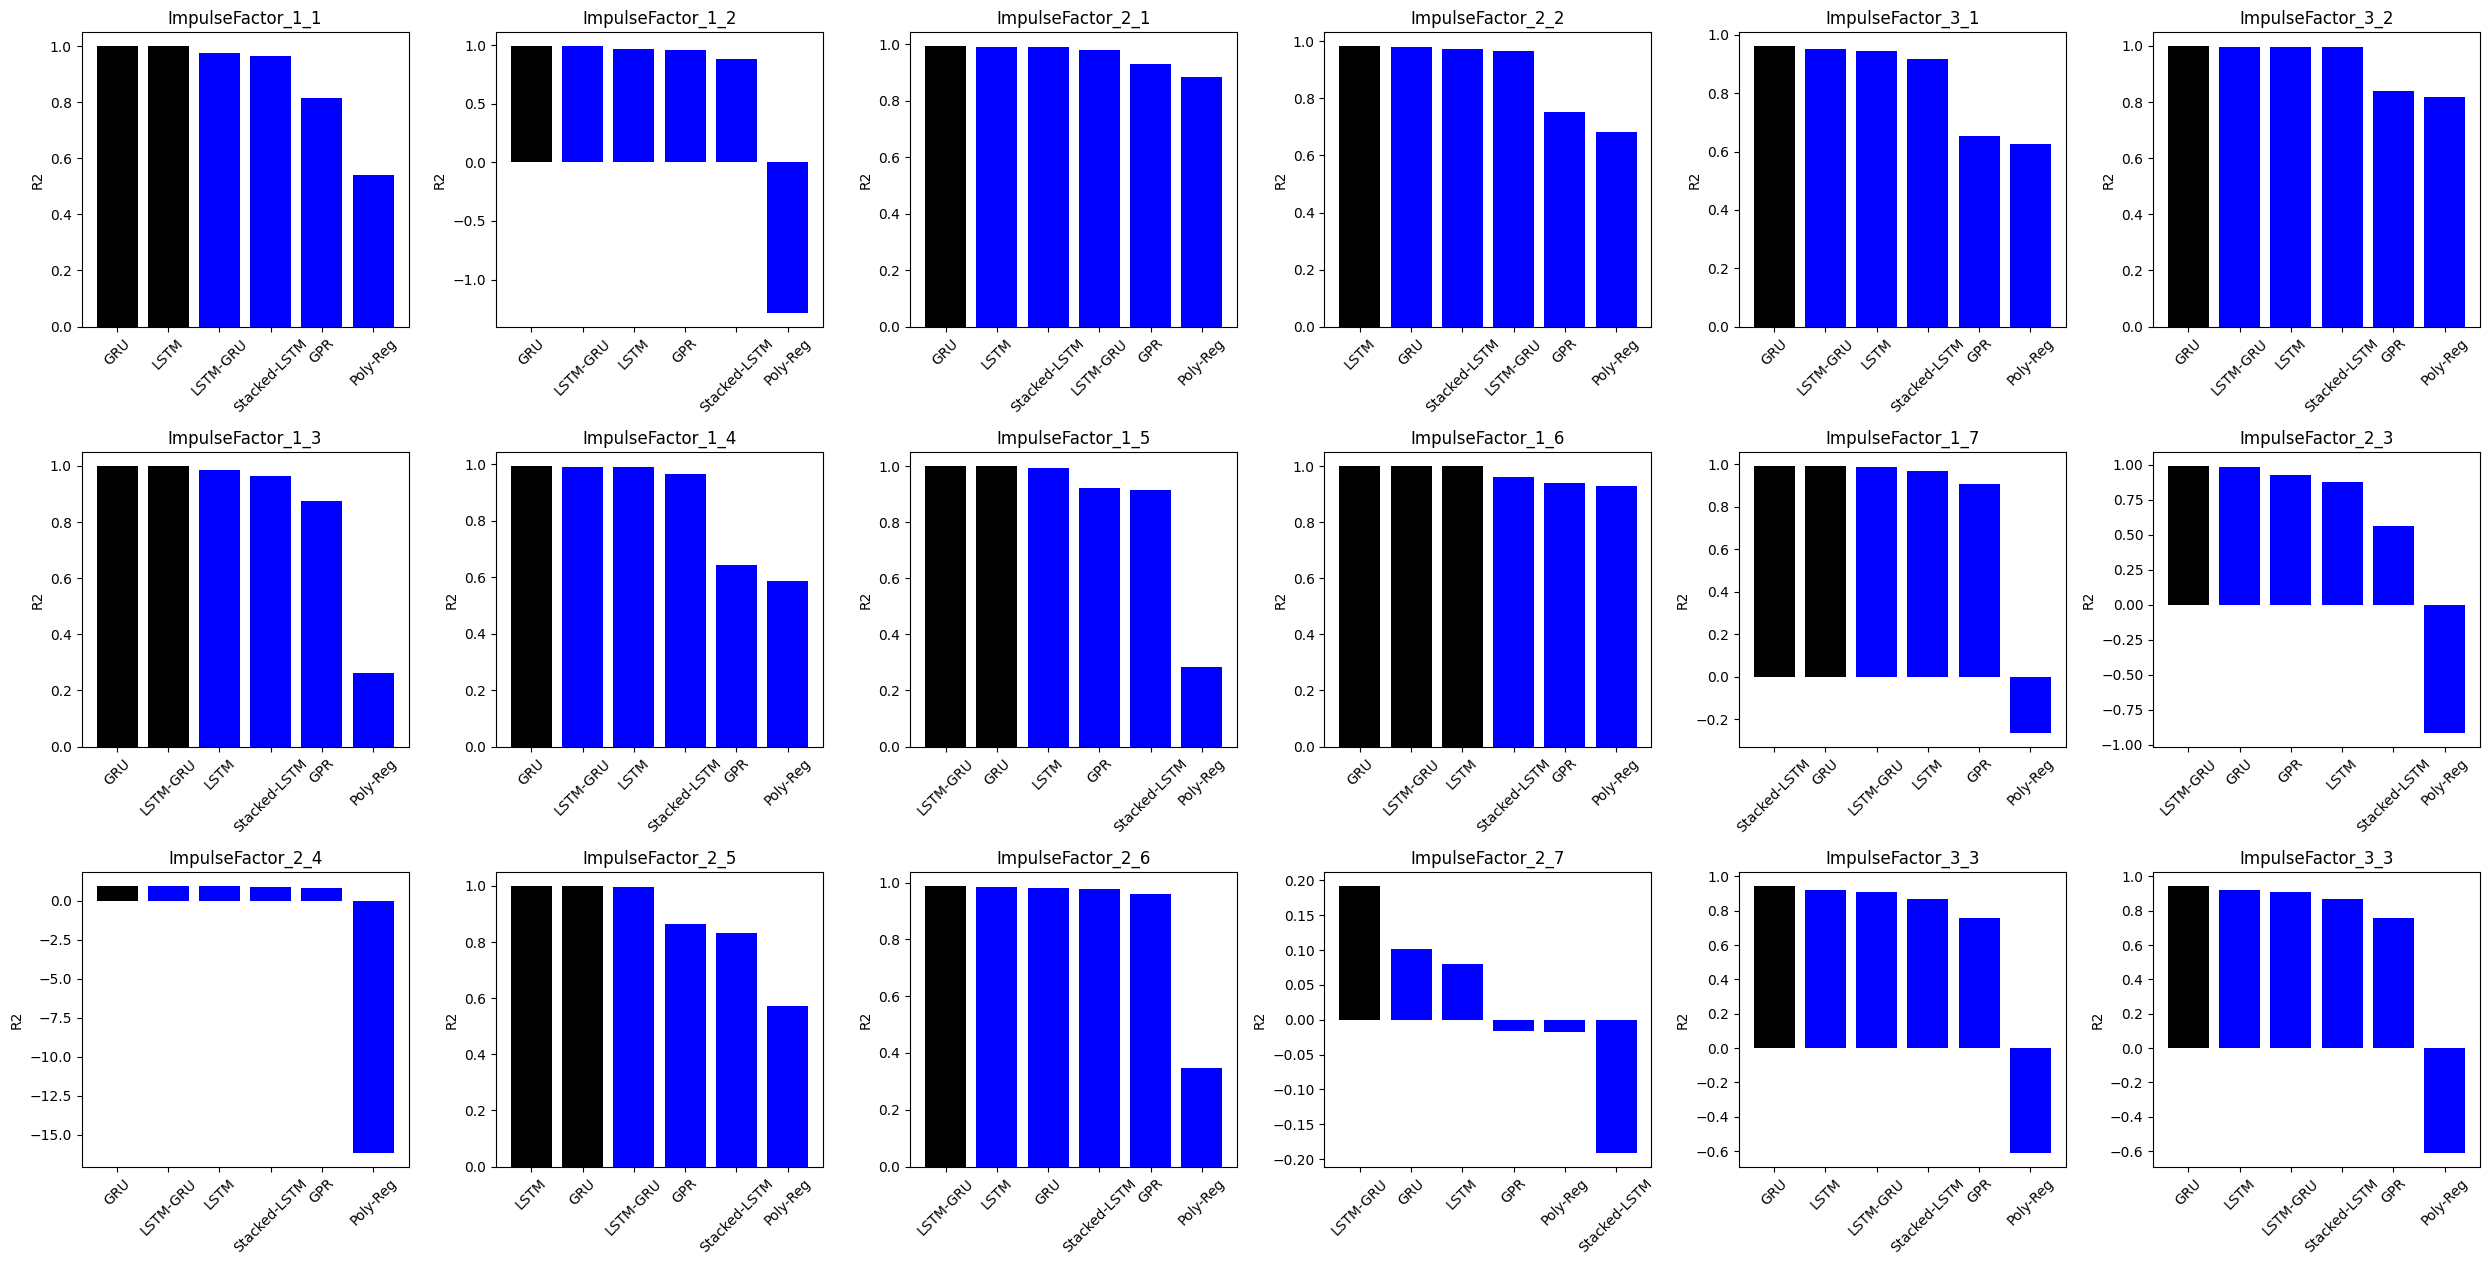

In [15]:
import matplotlib.pyplot as plt
import numpy as np

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
config = [1, "R2"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

fig, axes = plt.subplots(3, 6, figsize=(25, 0.75*len(bearing_ids)))

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, 16)

        # sort models by 
        keys = list(r2_25_perc.keys())
        values = [d[index] for d in r2_25_perc.values()]
        zipped = zip(keys, values)
        sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1], reverse=True)
        keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value to 2 digits
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        ax.bar(keys, values, color=bar_colors)
        ax.set_xticks(keys)
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45)
        ax.set_title(bearing_ids[index])
        ax.set_ylabel('R2')

plt.tight_layout()
plt.show()

75% Train

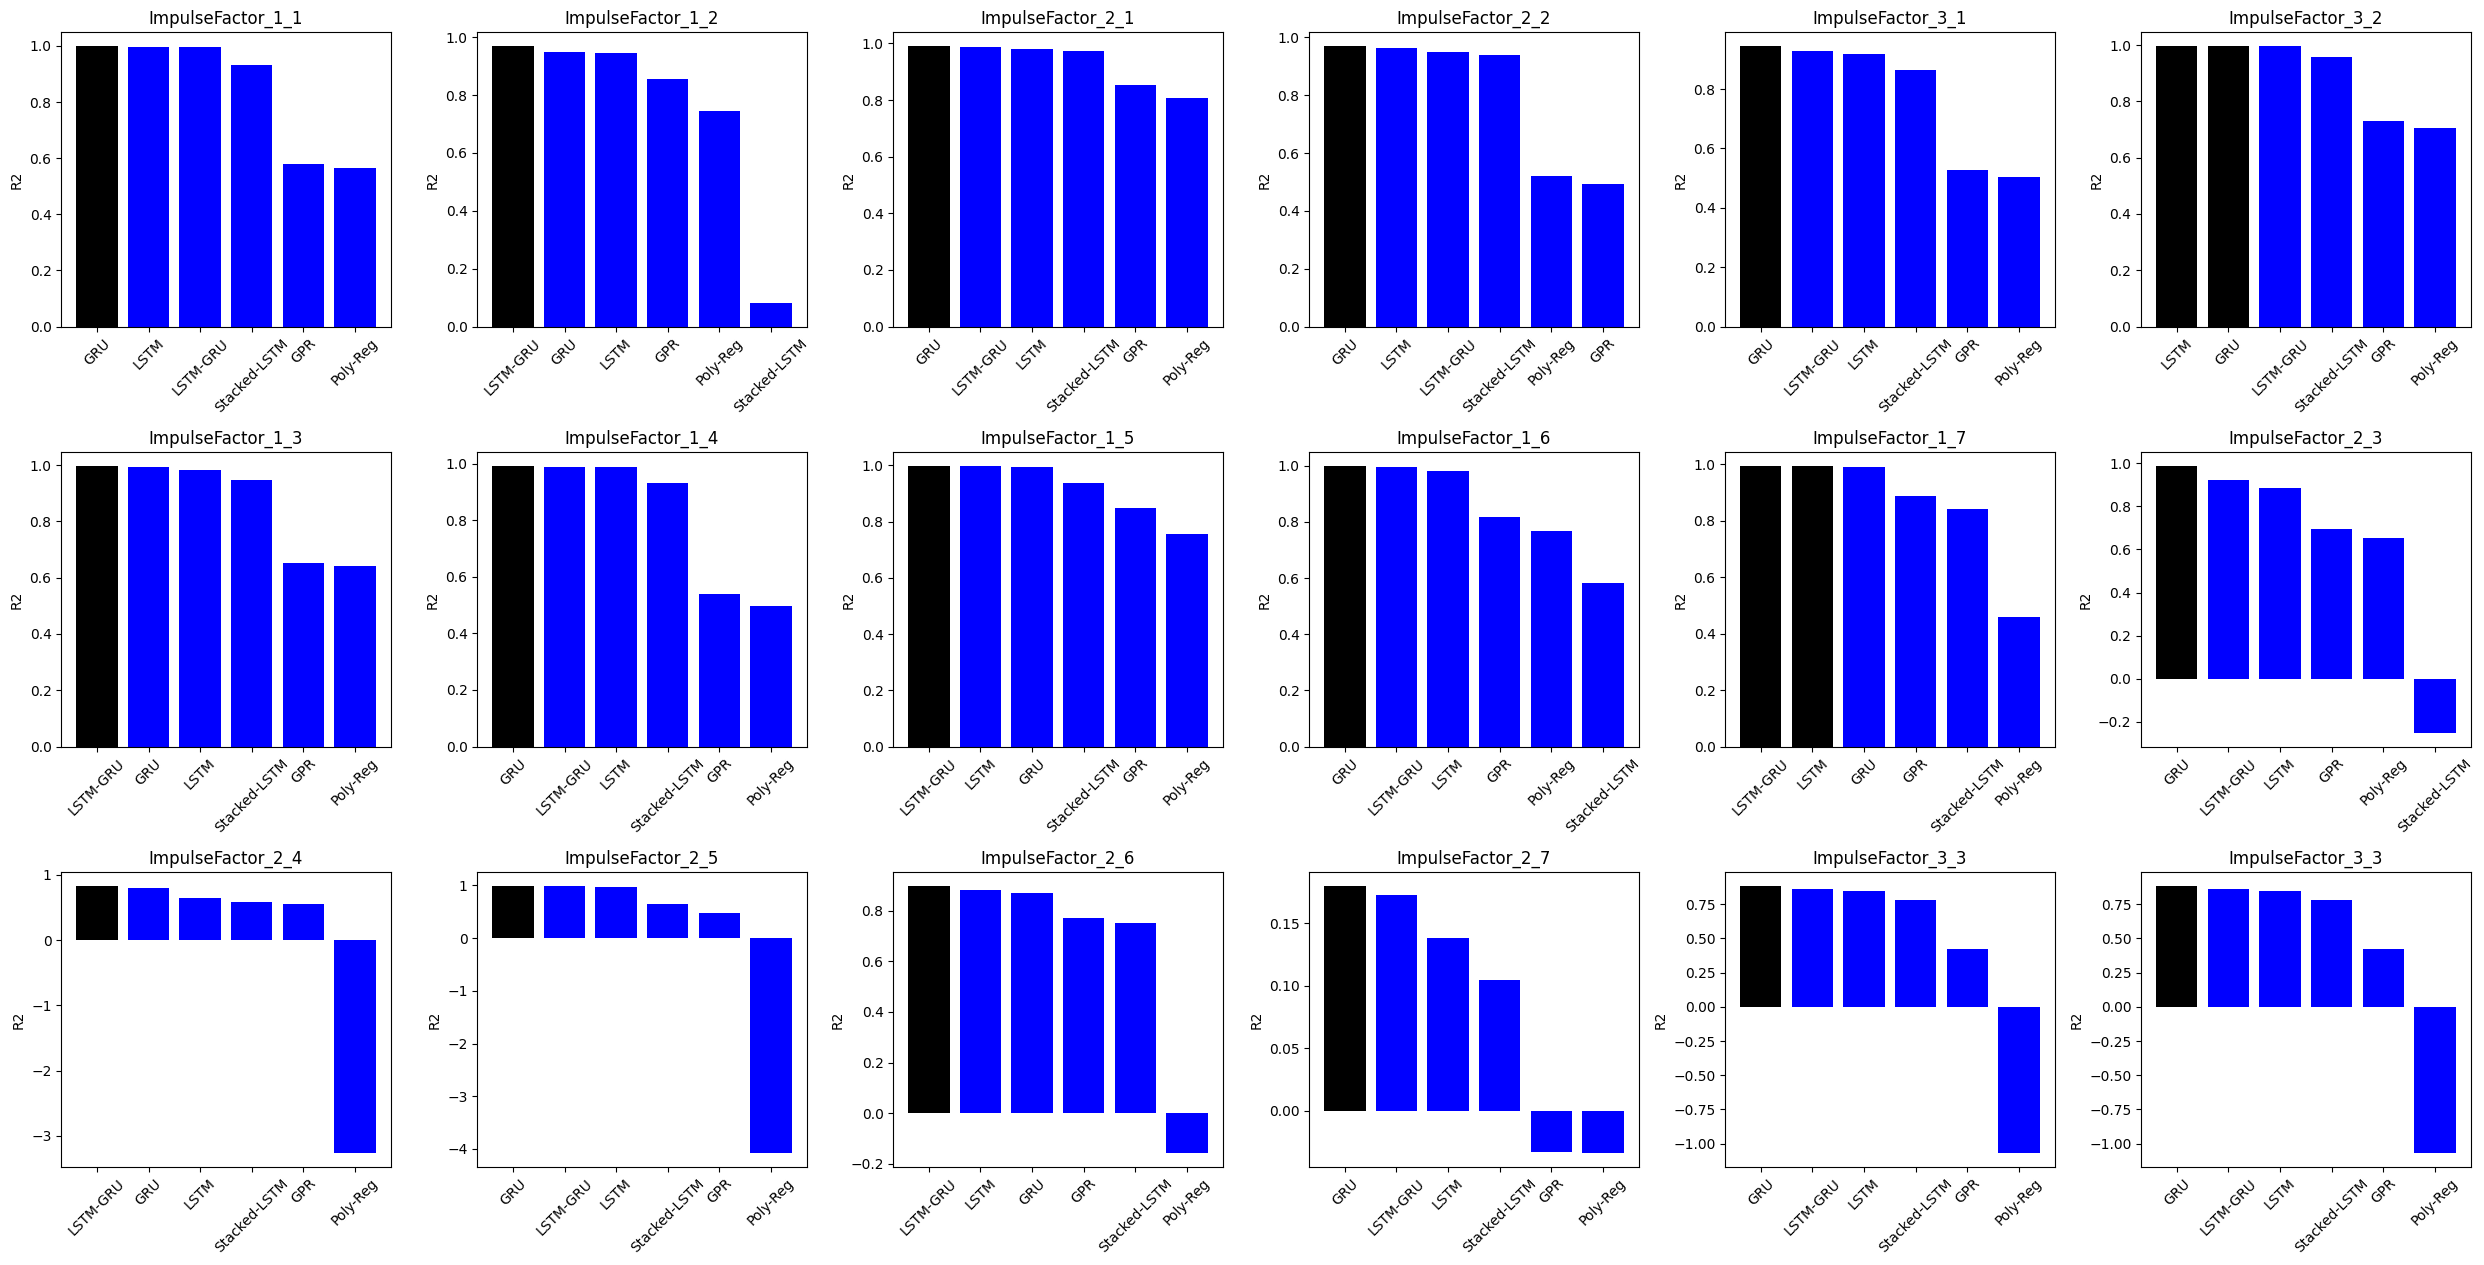

In [16]:
import matplotlib.pyplot as plt
import numpy as np

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
config = [2, "R2"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

fig, axes = plt.subplots(3, 6, figsize=(25, 0.75*len(bearing_ids)))

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, 16)

        # sort models by 
        keys = list(r2_25_perc.keys())
        values = [d[index] for d in r2_25_perc.values()]
        zipped = zip(keys, values)
        sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1], reverse=True)
        keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value to 2 digits
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        ax.bar(keys, values, color=bar_colors)
        ax.set_xticks(keys)
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45)
        ax.set_title(bearing_ids[index])
        ax.set_ylabel('R2')

plt.tight_layout()
plt.show()

#### RMSE

25% Train

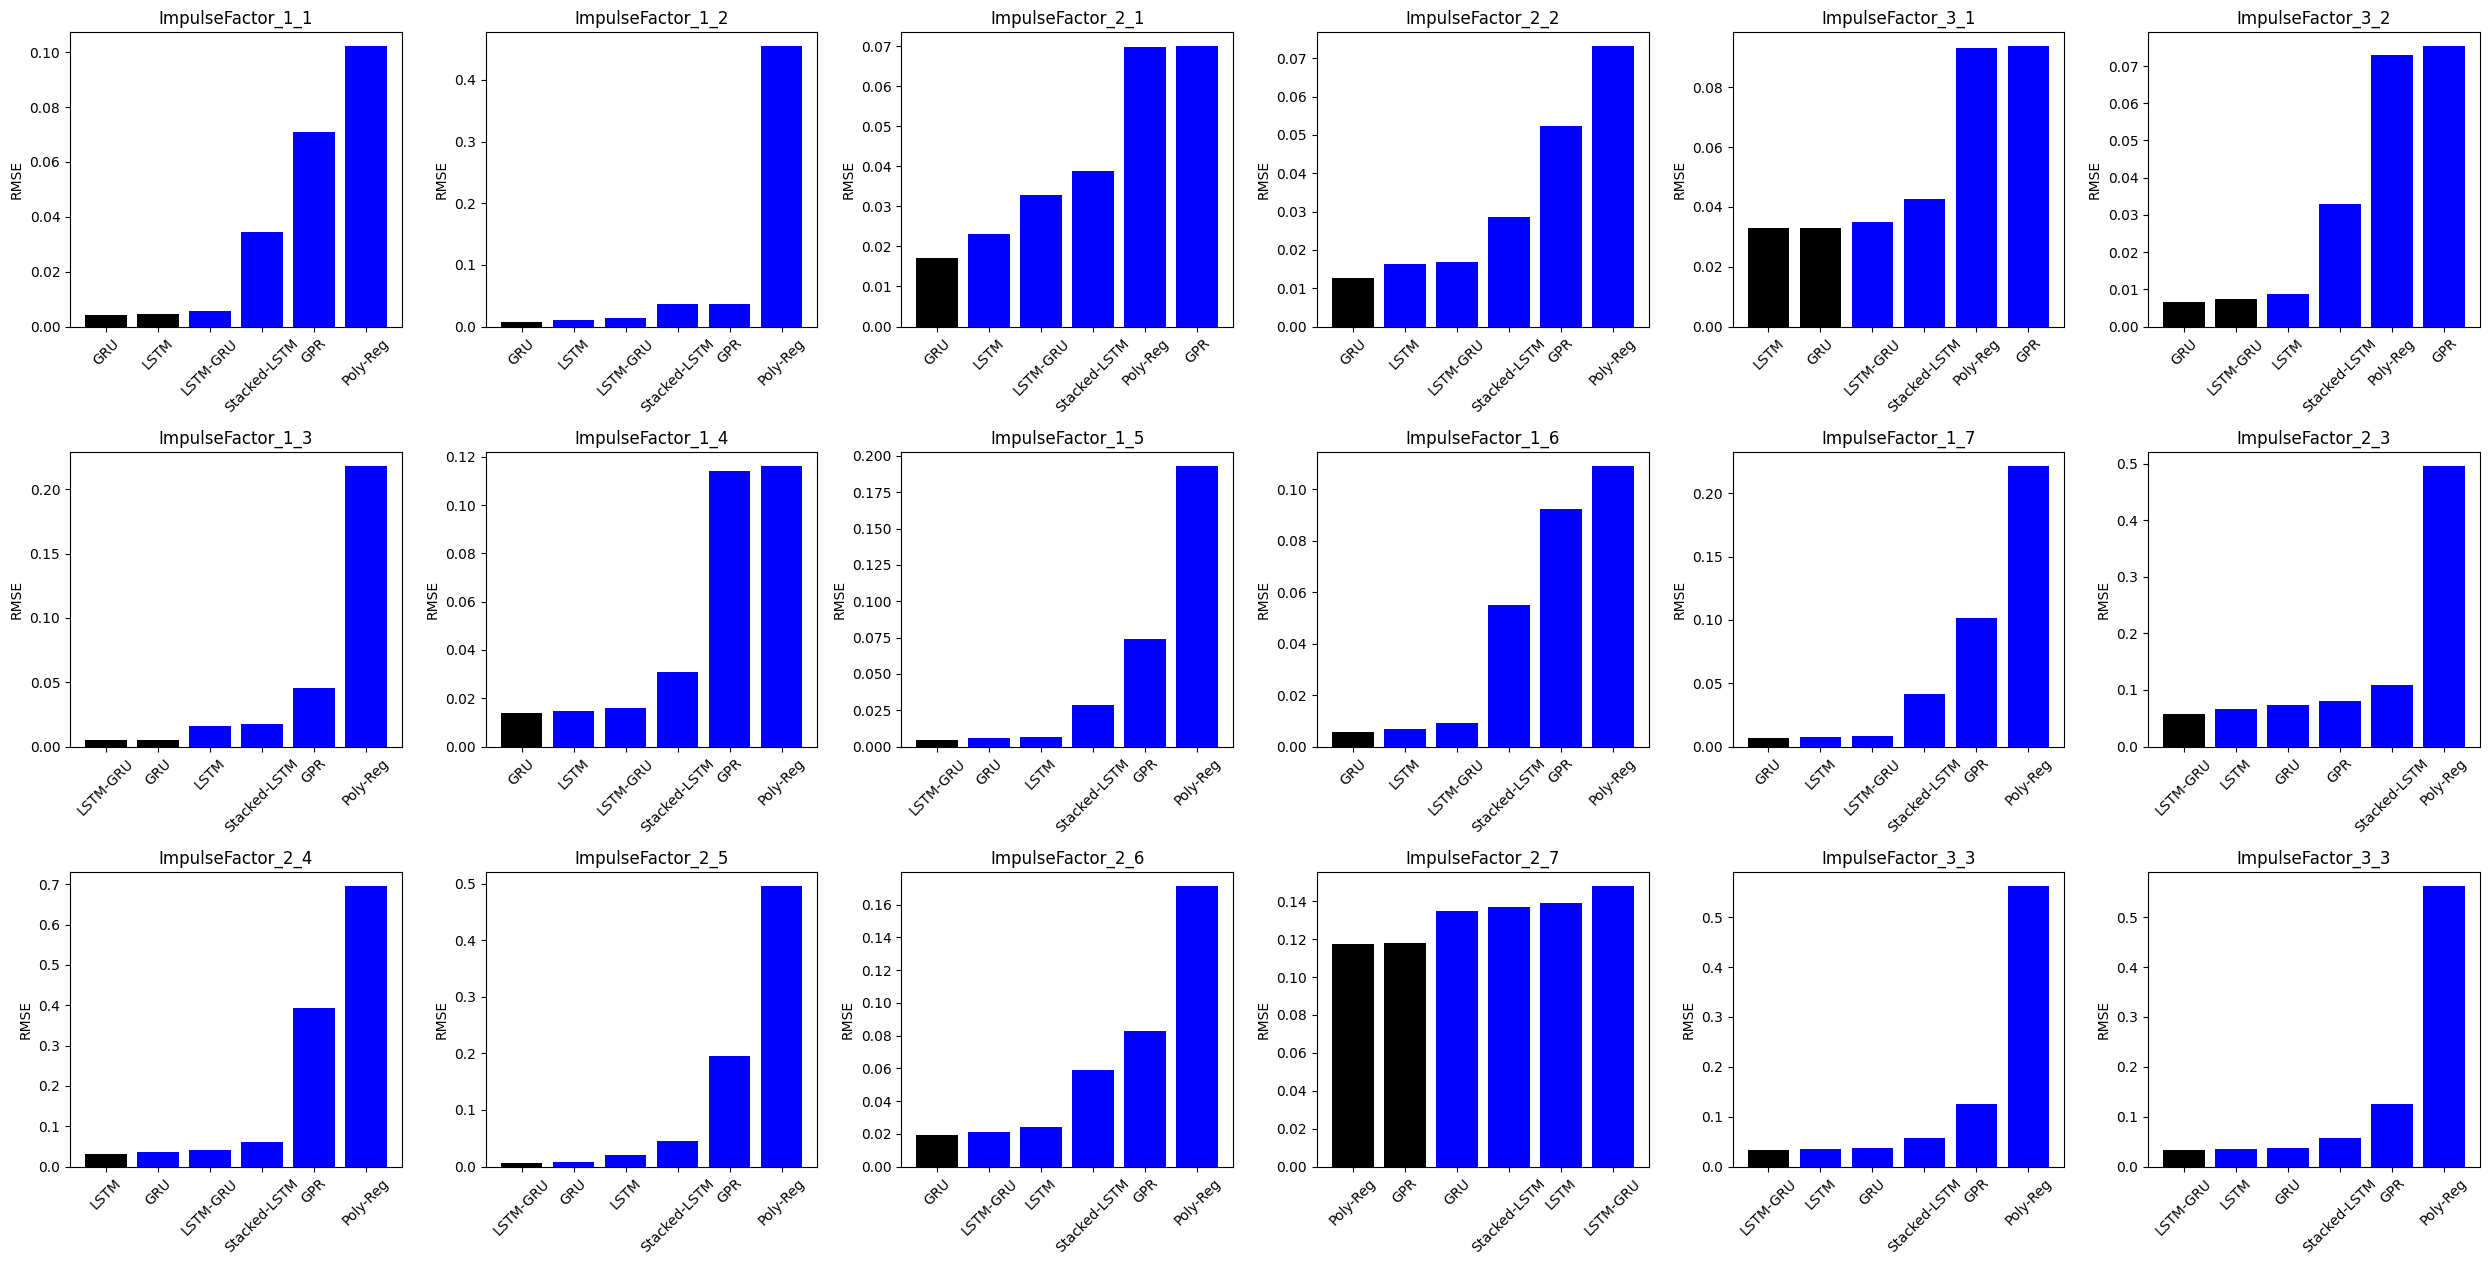

In [25]:
import matplotlib.pyplot as plt
import numpy as np

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
config = [0, "rmse"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

fig, axes = plt.subplots(3, 6, figsize=(25, 0.75*len(bearing_ids)))

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, 16)

        # sort models by 
        keys = list(r2_25_perc.keys())
        values = [d[index] for d in r2_25_perc.values()]
        zipped = zip(keys, values)
        sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1])
        keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value to 2 digits
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        ax.bar(keys, values, color=bar_colors)
        ax.set_xticks(keys)
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45)
        ax.set_title(bearing_ids[index])
        ax.set_ylabel('RMSE')

plt.tight_layout()
plt.show()

50% Train

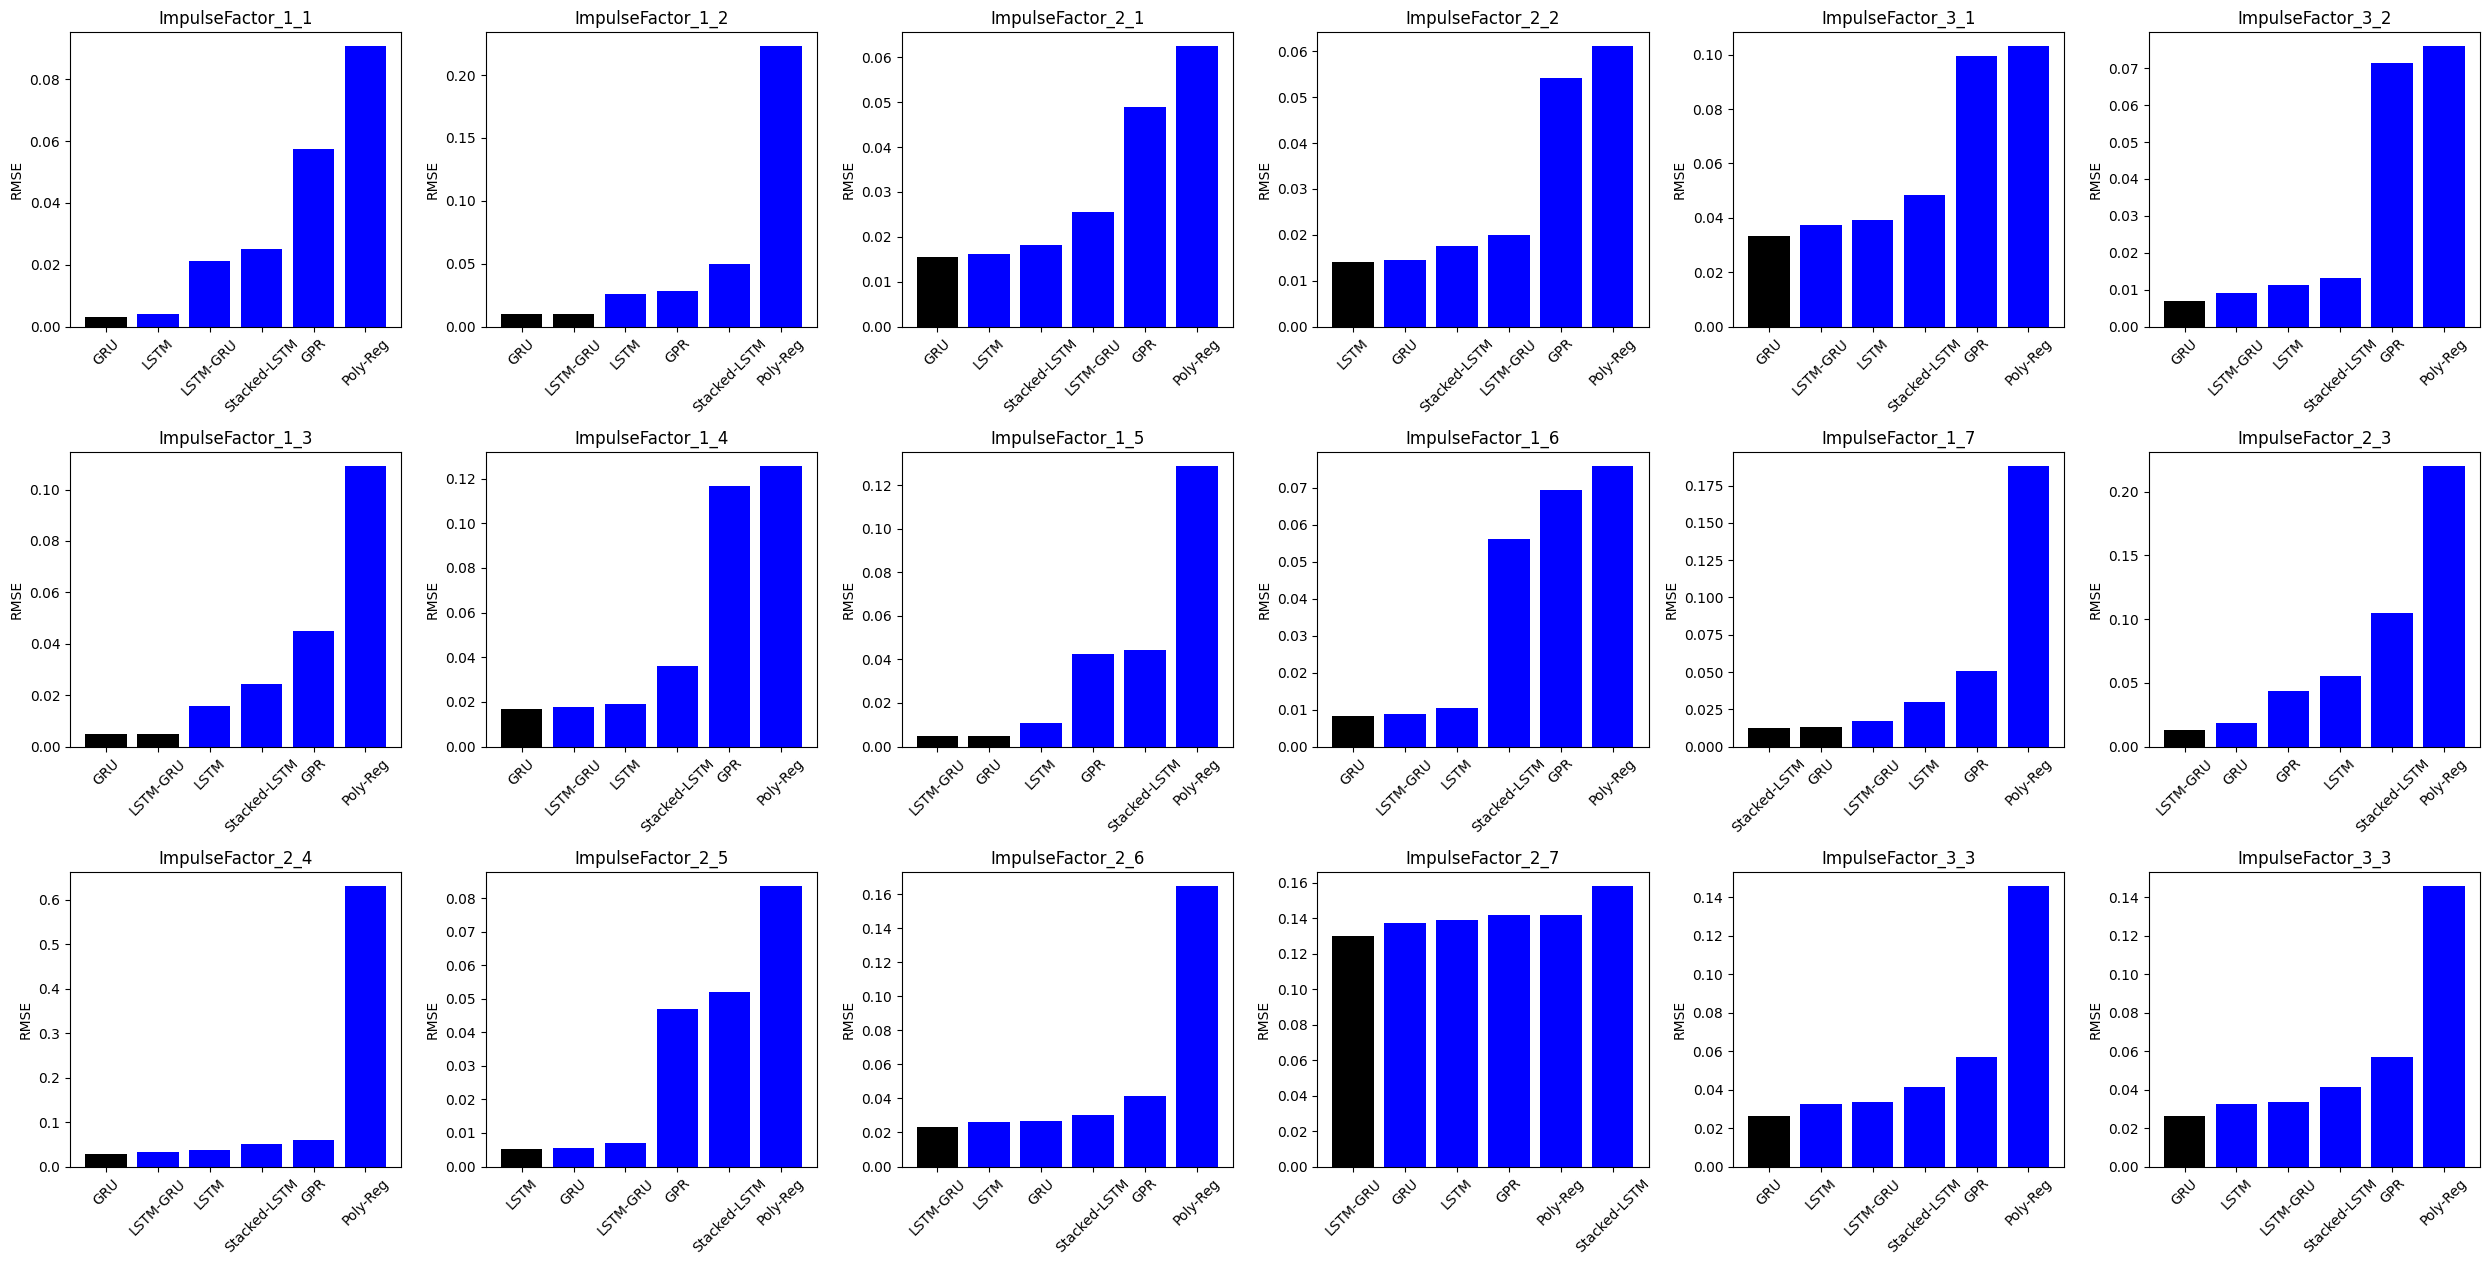

In [26]:
import matplotlib.pyplot as plt
import numpy as np

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
config = [1, "rmse"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

fig, axes = plt.subplots(3, 6, figsize=(25, 0.75*len(bearing_ids)))

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, 16)

        # sort models by 
        keys = list(r2_25_perc.keys())
        values = [d[index] for d in r2_25_perc.values()]
        zipped = zip(keys, values)
        sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1])
        keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value to 2 digits
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        ax.bar(keys, values, color=bar_colors)
        ax.set_xticks(keys)
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45)
        ax.set_title(bearing_ids[index])
        ax.set_ylabel('RMSE')

plt.tight_layout()
plt.show()

75% Train

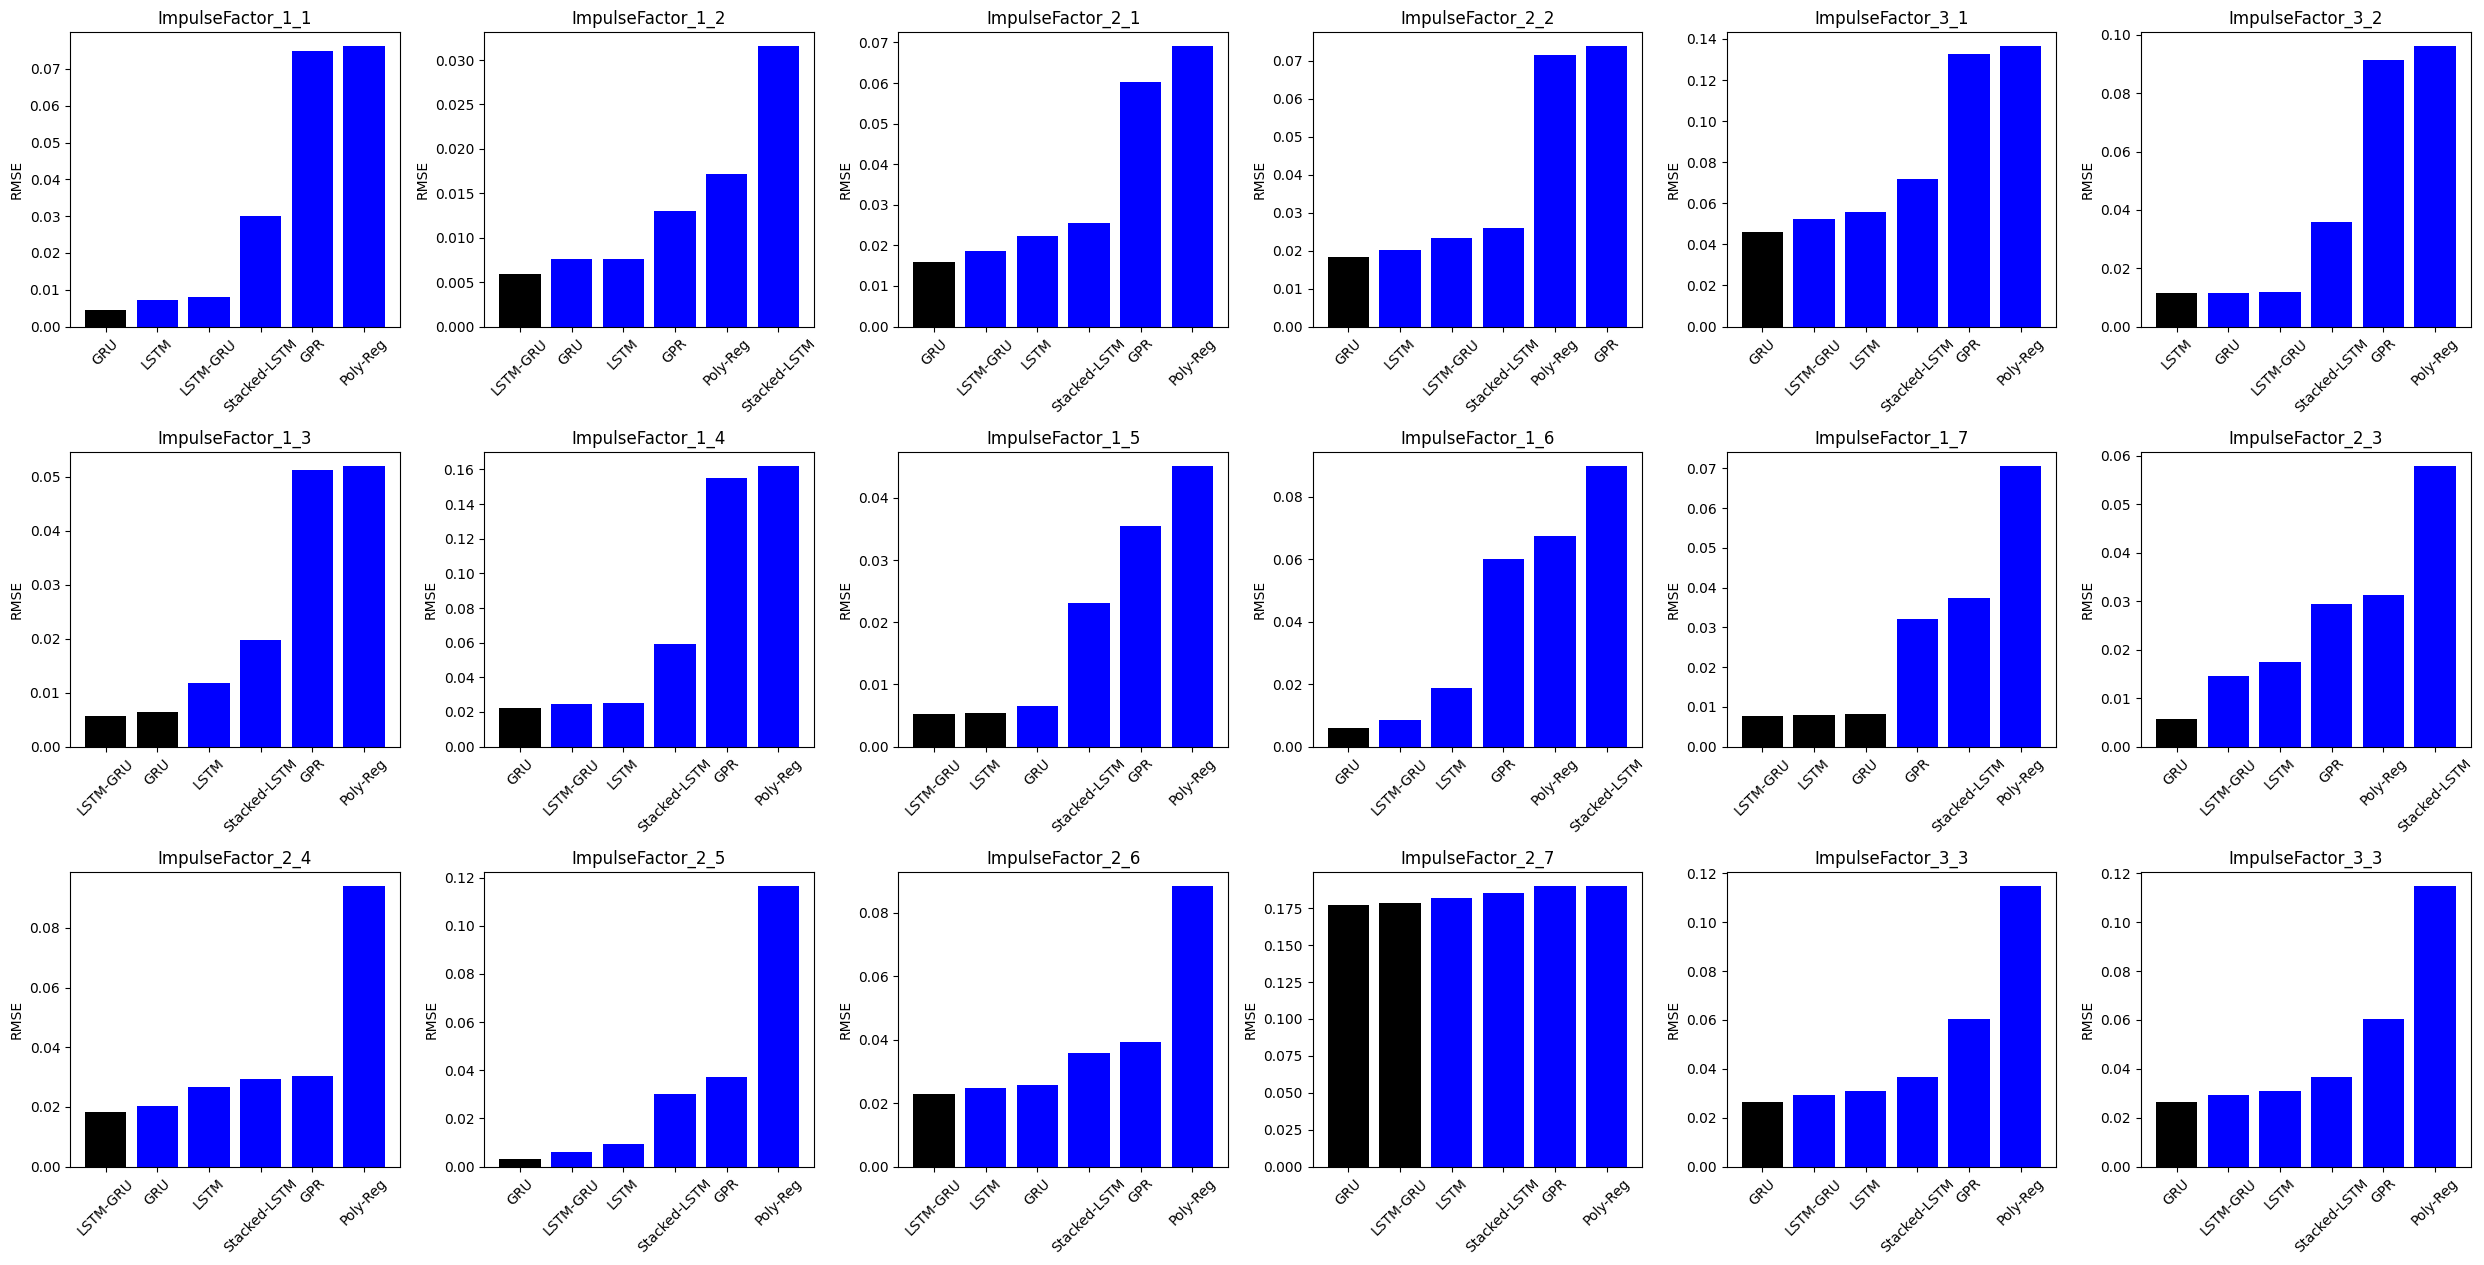

In [27]:
import matplotlib.pyplot as plt
import numpy as np

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
config = [2, "rmse"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

fig, axes = plt.subplots(3, 6, figsize=(25, 0.75*len(bearing_ids)))

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, 16)

        # sort models by 
        keys = list(r2_25_perc.keys())
        values = [d[index] for d in r2_25_perc.values()]
        zipped = zip(keys, values)
        sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1])
        keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value to 2 digits
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        ax.bar(keys, values, color=bar_colors)
        ax.set_xticks(keys)
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45)
        ax.set_title(bearing_ids[index])
        ax.set_ylabel('RMSE')

plt.tight_layout()
plt.show()

## Format all data into DF

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]

# config -> 0 = 25% train, 1 = 50% train, 2 = 75% train
config = [0, "rmse"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

In [101]:
x = r2_25_perc["Poly-Reg_Logistic"]
pd.DataFrame(x, index = [""]*len(x)).to_clipboard()